#### PRELIMINARIES - IMPORT LIBRARIES

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage import io, color
from sklearn import decomposition
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### PRELIMINARIES - IMPORT PERCEPTUAL COLORMAPS

In [2]:
_magma_data = np.load('magma.npy')
_inferno_data = np.load('inferno.npy')
_plasma_data = np.load('plasma.npy')
_viridis_data = np.load('viridis.npy')


cmaps = {}
for (name, data) in (('magma', _magma_data),
                     ('inferno', _inferno_data),
                     ('plasma', _plasma_data),
                     ('viridis', _viridis_data)):

    cmaps[name] = ListedColormap(data, name=name)

magma = cmaps['magma']
inferno = cmaps['inferno']
plasma = cmaps['plasma']
viridis = cmaps['viridis']

#### IMPORT AND DISPLAY NASA'S PLUTO IMAGES

In [3]:
# Psychedelic:
# http://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=373554
# https://www.nasa.gov/image-feature/psychedelic-pluto

# True Color:
# http://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=367259

# False colors:
# http://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=367260psychedelic pluto

ps = io.imread('nh-psychedelic-pluto_pca.png')
tc = io.imread('global-mosaic-of-pluto-in-true-color.jpg')[60:-60,220:-221,:3]
fc = io.imread('nh-pluto-in-false-color.jpg')[60:-60,220:-221,:3]


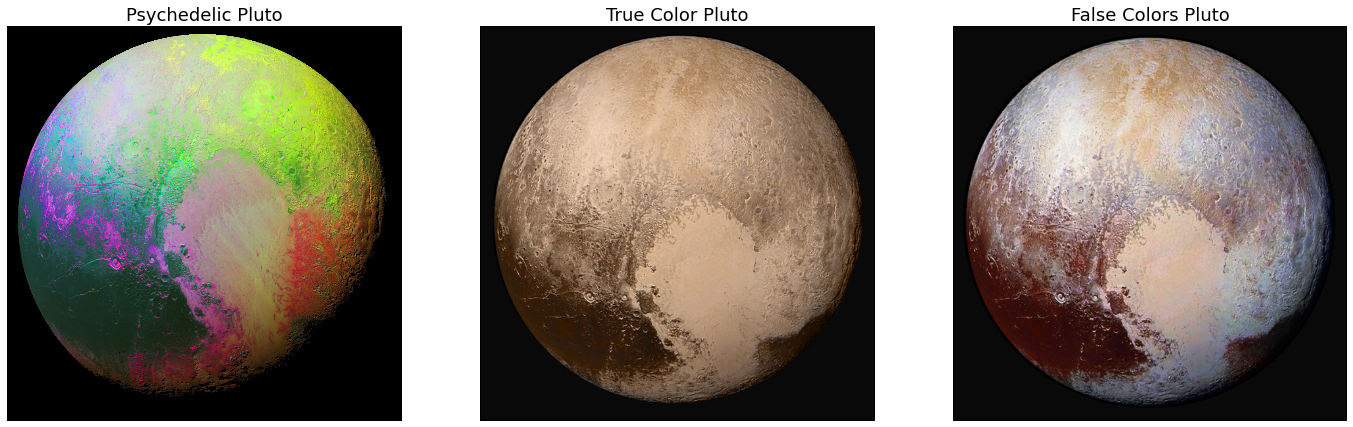

In [4]:
fig = plt.figure(figsize = (24,24))
ax1 = fig.add_subplot(1,3,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Psychedelic Pluto', fontsize=18)
plt.imshow(ps)

ax2 = fig.add_subplot(1,3,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto', fontsize=18)
plt.imshow(tc)

ax3 = fig.add_subplot(1,3,3)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Colors Pluto', fontsize=18)
plt.imshow(fc)

plt.show()

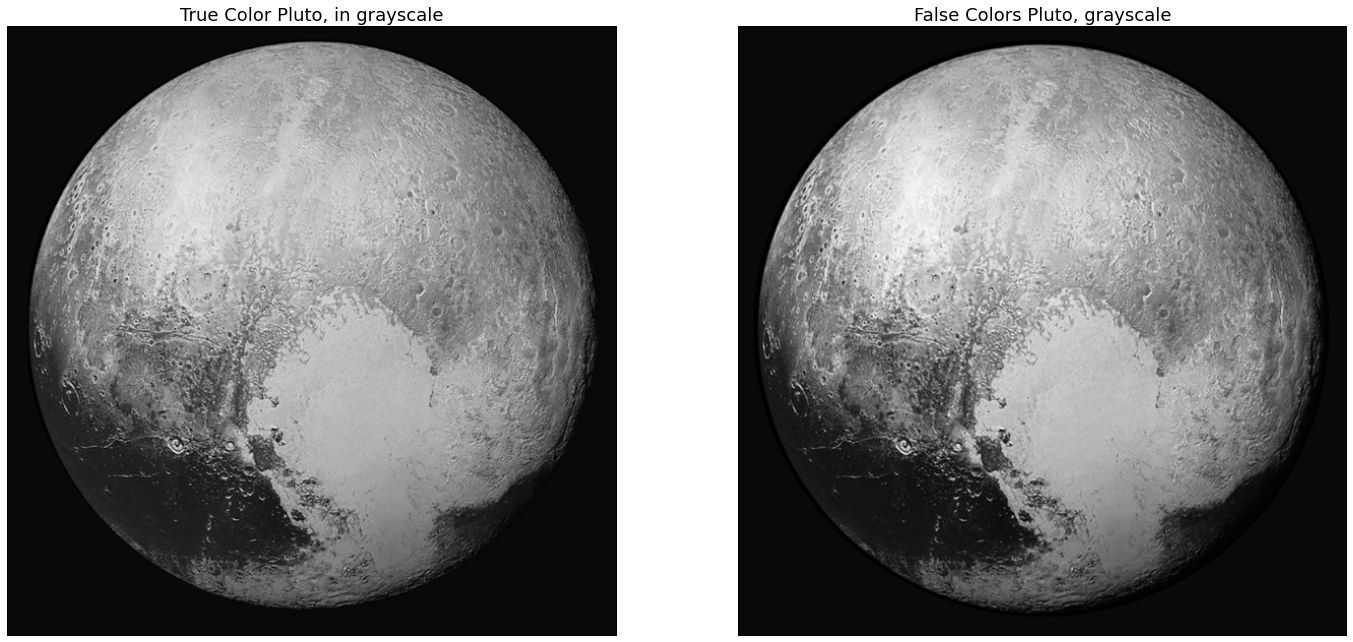

In [5]:
fig = plt.figure(figsize = (24,24))
ax2 = fig.add_subplot(1,2,1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto, in grayscale', fontsize=18)
plt.imshow(color.rgb2gray(tc), cmap = 'gray')

ax3 = fig.add_subplot(1,2,2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Colors Pluto, grayscale', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = 'gray')

plt.show()

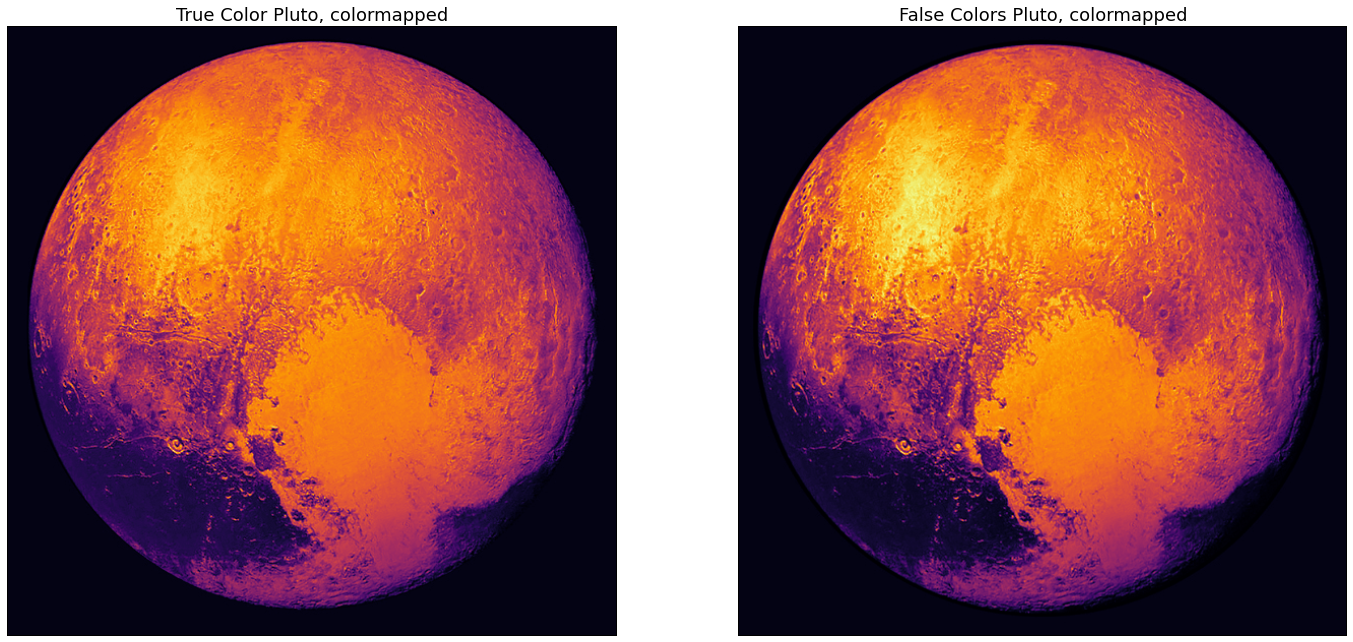

In [6]:
fig = plt.figure(figsize = (24,24))

ax2 = fig.add_subplot(1,2,1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto, colormapped', fontsize=18)
plt.imshow(color.rgb2gray(tc), cmap = inferno)

ax3 = fig.add_subplot(1,2,2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Colors Pluto, colormapped', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = inferno)

plt.show()

#### PCA OF THE FALSE COLOR PLUTO IMAGE

In [24]:
# rearranging data so as to have 3 1D vectors of R, G, B color components
print fc.shape
vectors = np.reshape(fc,(360000, 3))
print vectors.shape

(600, 600, 3)
(360000, 3)


In [32]:
pca = decomposition.PCA()
pca.fit(vectors)

np.set_printoptions(suppress=True) # so output is not in scientific notation
print pca.explained_variance_ratio_
print np.cumsum(pca.explained_variance_ratio_)

[ 0.98672292  0.01198244  0.00129464]
[ 0.98672292  0.99870536  1.        ]


##### It looks like the 1st component alone explains almost 99% of the variance. For the sake of looking though let's get the 1st and 2nd for now. 
##### But first, let's take a look at what is the 'meaning' of the principal components

In [34]:
print "Meaning of the 3 components:"
for component in pca.components_:
    print " + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, ['R','G','B']))

Meaning of the 3 components:
0.61 x R + 0.57 x G + 0.55 x B
-0.73 x R + 0.13 x G + 0.67 x B
0.31 x R + -0.81 x G + 0.50 x B


In [35]:
pca.n_components = 2
vectors_reduced = pca.fit_transform(vectors)
print vectors_reduced.shape

(360000, 2)


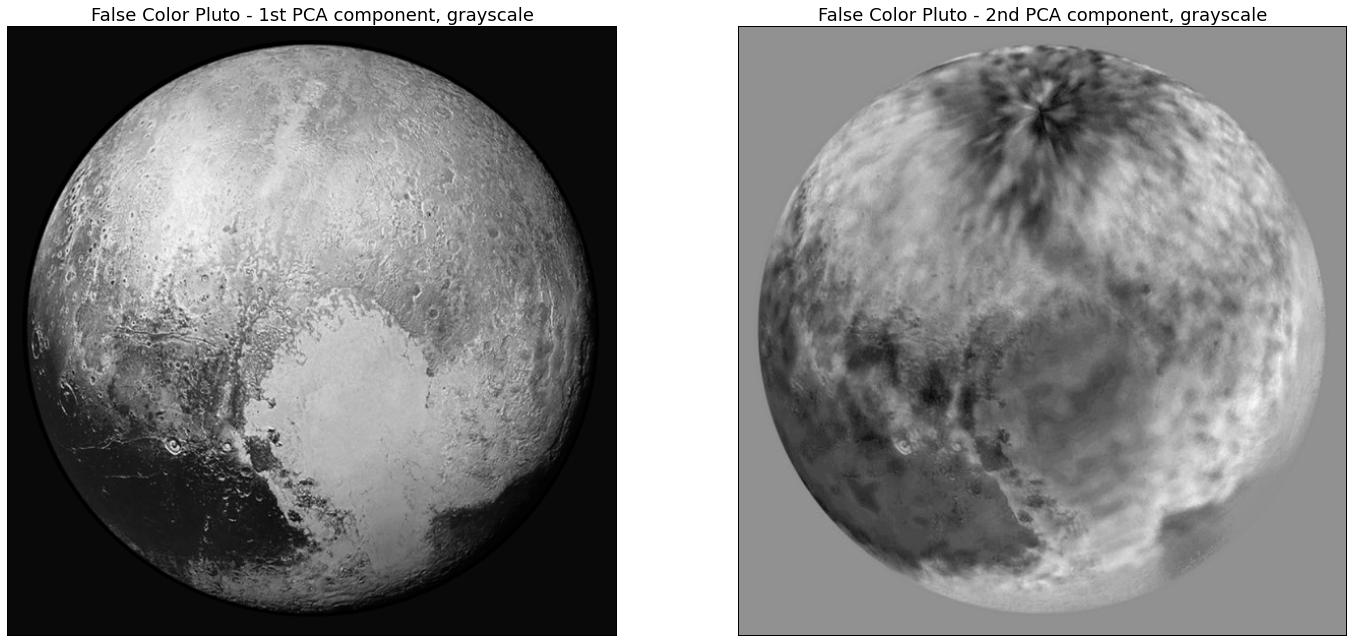

In [36]:
fig = plt.figure(figsize = (24,24))

ax2 = fig.add_subplot(1,2,1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('False Color Pluto - 1st PCA component, grayscale', fontsize=18)
plt.imshow(np.reshape(vectors_reduced[:,0],(600, 600)), cmap = 'gray')

ax3 = fig.add_subplot(1,2,2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Color Pluto - 2nd PCA component, grayscale', fontsize=18)
plt.imshow(np.reshape(vectors_reduced[:,1],(600, 600)), cmap = 'gray')

plt.show()


Cool! That IS psychedelic...

In [45]:
pca.n_components = 1
vectors_reduced = pca.fit_transform(vectors)
print vectors_reduced.shape

(360000, 1)


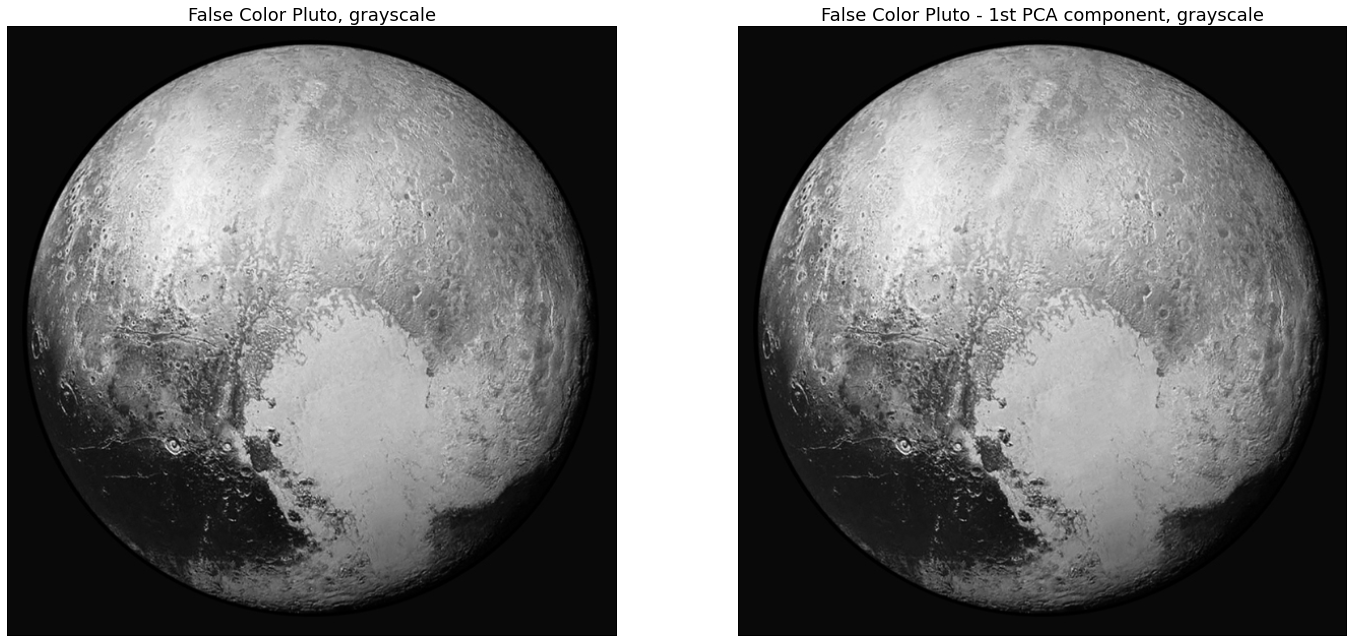

In [50]:
fig = plt.figure(figsize = (24,24))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('False Color Pluto, grayscale', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = 'gray')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('False Color Pluto - 1st PCA component, grayscale', fontsize=18)
plt.imshow(np.reshape(vectors_reduced,(600, 600)), cmap = 'gray')

plt.show()

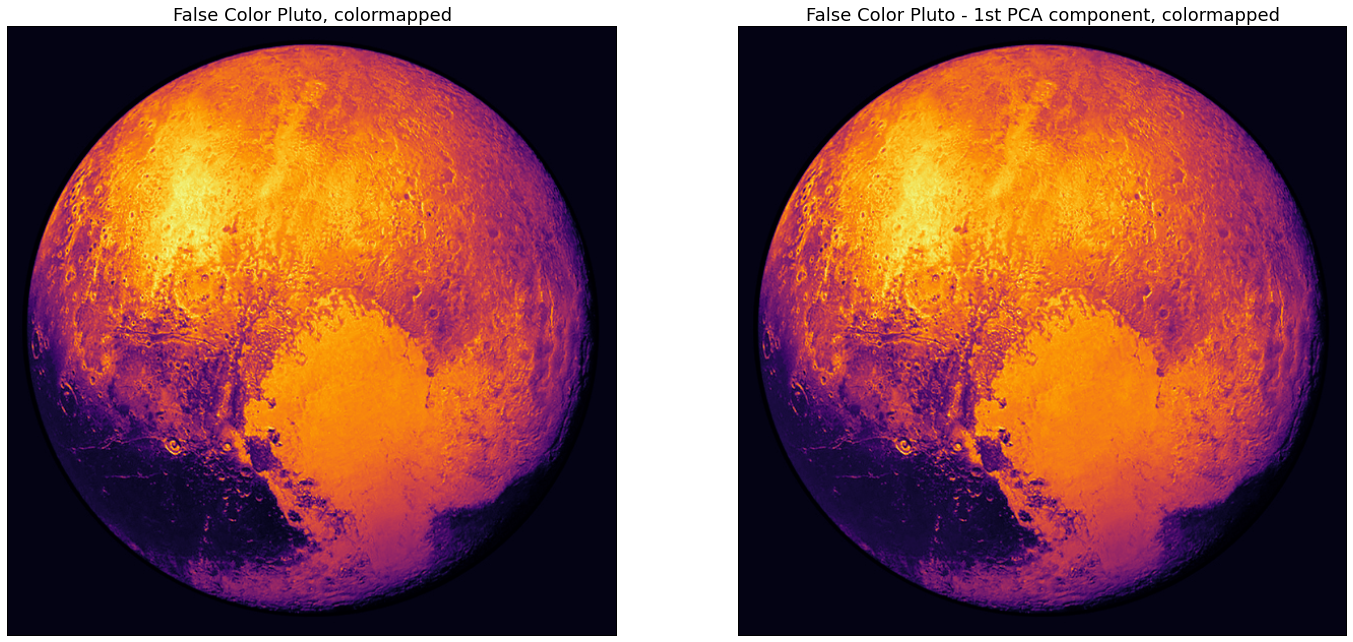

In [51]:
fig = plt.figure(figsize = (24,24))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('False Color Pluto, colormapped', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = inferno)

ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('False Color Pluto - 1st PCA component, colormapped', fontsize=18)
plt.imshow(np.reshape(vectors_reduced,(600, 600)), origin = 'upper', cmap = inferno)

plt.show()

#### COMMENTS

OK, first principal component of an image is good for compression, as shown by the comparison in the cell below. 

In [52]:
print fc.size
print vectors_reduced.size

1080000
360000
